<a href="https://colab.research.google.com/github/BHANU344/STML-ASS-S-/blob/main/STML_ASSIGNMENT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[(0.1, 0.7058823529411765), (0.2, 0.7313432835820896), (0.3, 0.7821782178217822), (0.4, 0.746268656716418), (0.5, 0.7365269461077845)]


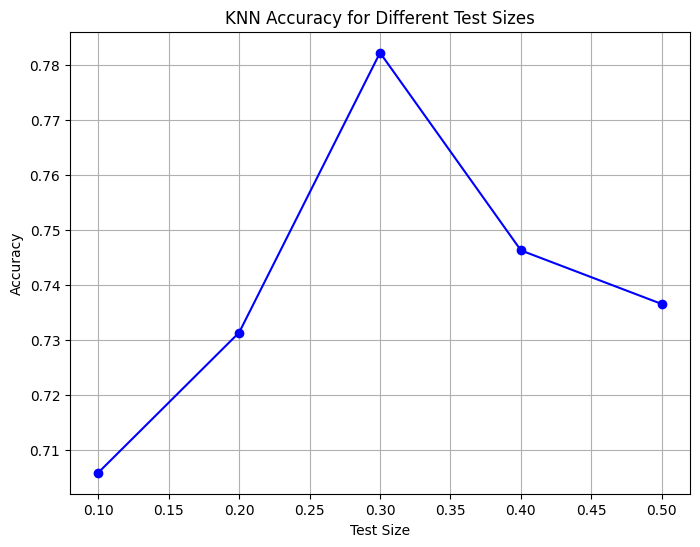

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

label_encoders = {}
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data_cleaned = data.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)
X = data_cleaned.drop('Patient_Status', axis=1)
y = data_cleaned['Patient_Status']

def evaluate_knn_with_test_sizes(test_sizes):
    results = []
    for test_size in test_sizes:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((test_size, accuracy))

    return results

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracy_results = evaluate_knn_with_test_sizes(test_sizes)

print(accuracy_results)

test_sizes = [x[0] for x in accuracy_results]
accuracies = [x[1] for x in accuracy_results]

plt.figure(figsize=(8, 6))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Test Sizes')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')